In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [140]:
job="python_developer"
df=pd.read_csv(f"../separated_jobs/{job}.csv")

In [141]:
df.head()

,company_name,job_role,job_location,salary_pa,skills,company_rating,standardized_job_role
0,Dehazelabs,Junior Python Developer,Remote,300000.0,"CI/CD, Data modeling, Azure, Software troubles...",3.0,Python Developer
1,client in excellent opportunity,Python Developer,Remote,1100000.0,"English, Research, Analysis skills, Quality as...",NaN,Python Developer
2,Zoof Software Solutions,Junior Python Developer,Remote,480000.0,"Kubernetes, AWS, Docker, PostgreSQL, REST",4.6,Python Developer
3,REIZEND PRIVATE LIMITED,Python Developer ( For Night Shifts),Thiruvananthapuram,500000.0,"Jira, Computer science, Power BI, Data mining,...",3.6,Python Developer
4,FIN Infocom,Python Developer Intern,India,900000.0,"Data modeling, CSS, NoSQL, Git, Databases",NaN,Python Developer


In [142]:
df.isnull().sum()

company_name              0
job_role                  0
job_location              0
salary_pa                 0
skills                    0
company_rating           57
standardized_job_role     0
dtype: int64

In [143]:
df['salary_pa'] = df['salary_pa'].astype(float) / 100000
df.rename(columns = {'salary_pa':'salary_lpa'}, inplace = True)

In [144]:
df[df['salary_lpa'] == 0]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
10,Aura Bizcom,Python Developer Intern,Remote,0.0,"Azure, CSS, React, Web development, Git",NaN,Python Developer
14,Emerinter,PYTHON DEVELOPER,India,0.0,"English, Python",NaN,Python Developer
29,IQZ Systems,Python Developer,Remote,0.0,"CSS, NoSQL, Databases, SQL, OOP",4.8,Python Developer
37,PradeepIT Consulting Services,Python Developer,Bengaluru,0.0,"AWS, Python",4.5,Python Developer
39,Veracity Software,Jr Python Developer,India,0.0,"NoSQL, Databases, SQL, JavaScript, APIs",4.1,Python Developer
47,dv-indan,Python developer,Chennai,0.0,"Programmable logic controllers, Machine learni...",NaN,Python Developer
48,e-Stone Information Technology,Python Developer,Remote,0.0,"Jira, Git, SQL, Project management, Scrum",3.7,Python Developer
54,Quytech,Python Developer,Remote,0.0,"CSS, Relational databases, Git, Databases, Jav...",4.1,Python Developer
59,Knack Consulting Services Pvt Ltd,Python Developer,Bengaluru,0.0,Python,3.8,Python Developer
65,Persistent Systems,Python Developer,India,0.0,"JavaScript, Django, Python, HTML",3.7,Python Developer


### Filling the null values by replacing with average salary of company rating

In [146]:
df['company_rating'] = df['company_rating'].fillna(0)
df["salary_lpa"]=df.salary_lpa.fillna(0)
avg_salary_by_rating = df[df['salary_lpa'] > 0].groupby('company_rating')['salary_lpa'].mean()


In [147]:
def map_with_nearest_rating(row, avg_salary_by_rating):
    if row['salary_lpa'] == 0:  # Check if salary is 0
        rating = row['company_rating']
        if rating in avg_salary_by_rating:  # If exact match exists
            return avg_salary_by_rating[rating]
        else:  # Find the closest rating
            nearest_rating = min(avg_salary_by_rating.keys(), key=lambda x: abs(x - rating))
            return avg_salary_by_rating[nearest_rating]
    return row['salary_lpa']  # If salary isn't 0, return the original value

# Apply the function to the DataFrame
df['salary_lpa'] = df.apply(lambda row: map_with_nearest_rating(row, avg_salary_by_rating), axis=1)


In [148]:
df

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,Dehazelabs,Junior Python Developer,Remote,3.0,"CI/CD, Data modeling, Azure, Software troubles...",3.0,Python Developer
1,client in excellent opportunity,Python Developer,Remote,11.0,"English, Research, Analysis skills, Quality as...",0.0,Python Developer
2,Zoof Software Solutions,Junior Python Developer,Remote,4.8,"Kubernetes, AWS, Docker, PostgreSQL, REST",4.6,Python Developer
3,REIZEND PRIVATE LIMITED,Python Developer ( For Night Shifts),Thiruvananthapuram,5.0,"Jira, Computer science, Power BI, Data mining,...",3.6,Python Developer
4,FIN Infocom,Python Developer Intern,India,9.0,"Data modeling, CSS, NoSQL, Git, Databases",0.0,Python Developer
...,...,...,...,...,...,...,...
119,Helius Technologies,Software Application Engineer (Python),India,9.0,"Statistics, Image processing, Computer vision,...",4.2,Python Developer
120,Aptiv plc,Senior Python Developer,Bengaluru,9.0,"Data analysis skills, Agile, Linux, Python",3.5,Python Developer
121,Qualcomm,Engineer - C#/Python,Hyderābād,5.5,"Jira, React, C#, Microsoft SQL Server, .NET",3.9,Python Developer
122,Revolo InfoTech,Python Developer,Mumbai,7.5,"Node.js, NoSQL, Git, AWS, JavaScript",5.0,Python Developer


In [149]:
df[df.salary_lpa.isnull()]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role


In [150]:
df.describe()

,salary_lpa,company_rating
count,124.000000,124.000000
mean,9.358716,2.093548
std,10.210527,1.989229
min,0.300000,0.000000
25%,4.500000,0.000000
50%,5.500000,3.150000
75%,11.100000,3.900000
max,48.000000,5.000000


In [151]:
df.nunique()

company_name             119
job_role                  38
job_location              27
salary_lpa                54
skills                   117
company_rating            23
standardized_job_role      1
dtype: int64

In [152]:
df.to_csv(f"../joining_data/{job}.csv",index=False)

### Analyzing the skills required for Backend jobs

In [154]:

df['skills'] = df['skills'].str.lower().str.split(', ')  


all_skills = [skill for sublist in df['skills'].dropna() for skill in sublist]


In [155]:
from collections import Counter


skill_counts = Counter(all_skills)


skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])


skill_df = skill_df.sort_values(by='Count', ascending=False)
print(skill_df)


             Skill  Count
27          python     40
21             git     30
20             css     30
2            azure     25
25          django     21
..             ...    ...
89              ux      1
90              ui      1
91   visual studio      1
92          ubuntu      1
122      bootstrap      1

[123 rows x 2 columns]


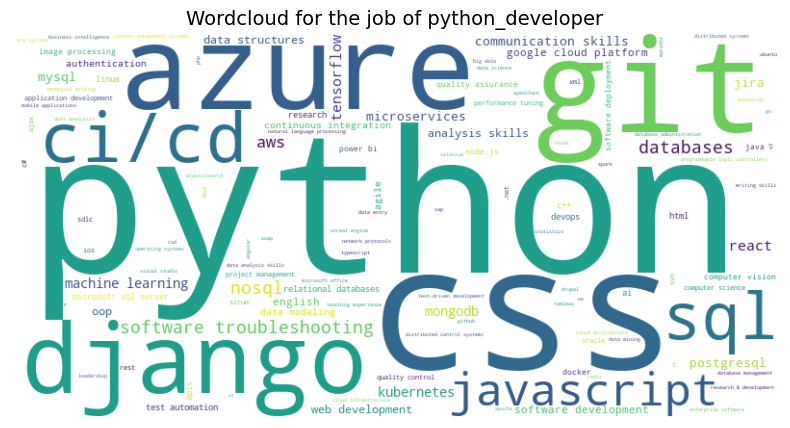

In [156]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(skill_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f"Wordcloud for the job of {job}", fontsize=14)  
plt.axis("off")
plt.show()


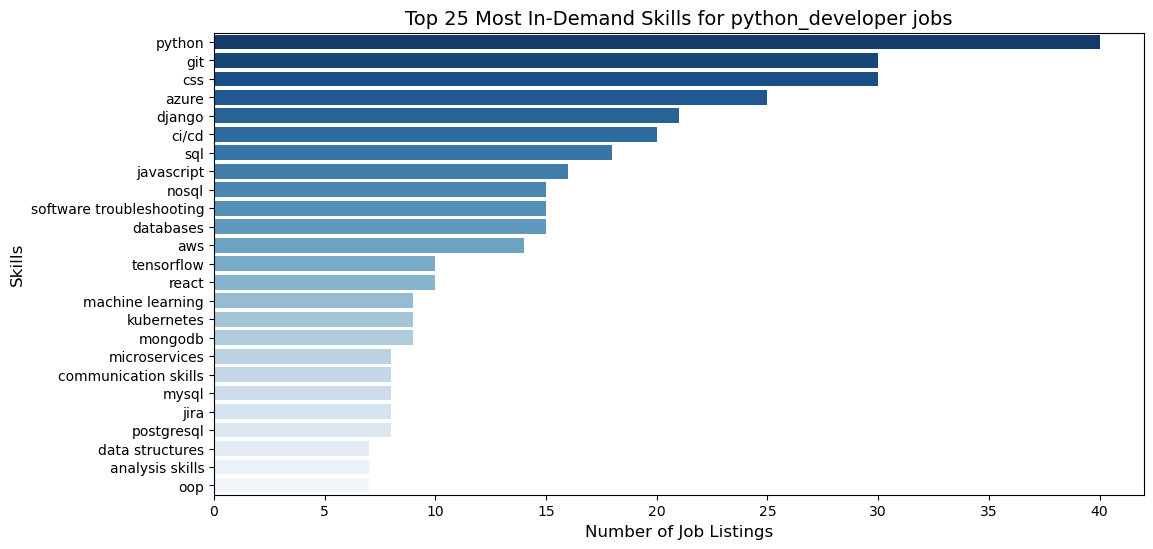

In [157]:
top_skills = skill_df.head(25)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills['Count'], y=top_skills['Skill'], palette="Blues_r")

plt.title(f"Top 25 Most In-Demand Skills for {job} jobs", fontsize=14)
plt.xlabel("Number of Job Listings", fontsize=12)
plt.ylabel("Skills", fontsize=12)
plt.show()


### Company vs Salary

In [159]:
top_companies = df.groupby('company_name')['salary_lpa'].mean().reset_index()


top_companies = top_companies.sort_values(by='salary_lpa', ascending=False)


print(top_companies.head(10))


                       company_name  salary_lpa
17                              CIS       48.00
102              WAHY LAB SOLUTIONS       48.00
44                        HelixBeat       42.00
103                     Weavers Web       42.00
87                 STW Services LLP       36.00
69   Notchup (formerly codemonk.ai)       36.00
81     R. Wadiwala Security Pvt Ltd       22.00
21    Corporate Hierarchy Solutions       20.50
42              Heliconia Solutions       20.16
36                 Gairme Solutions       18.50


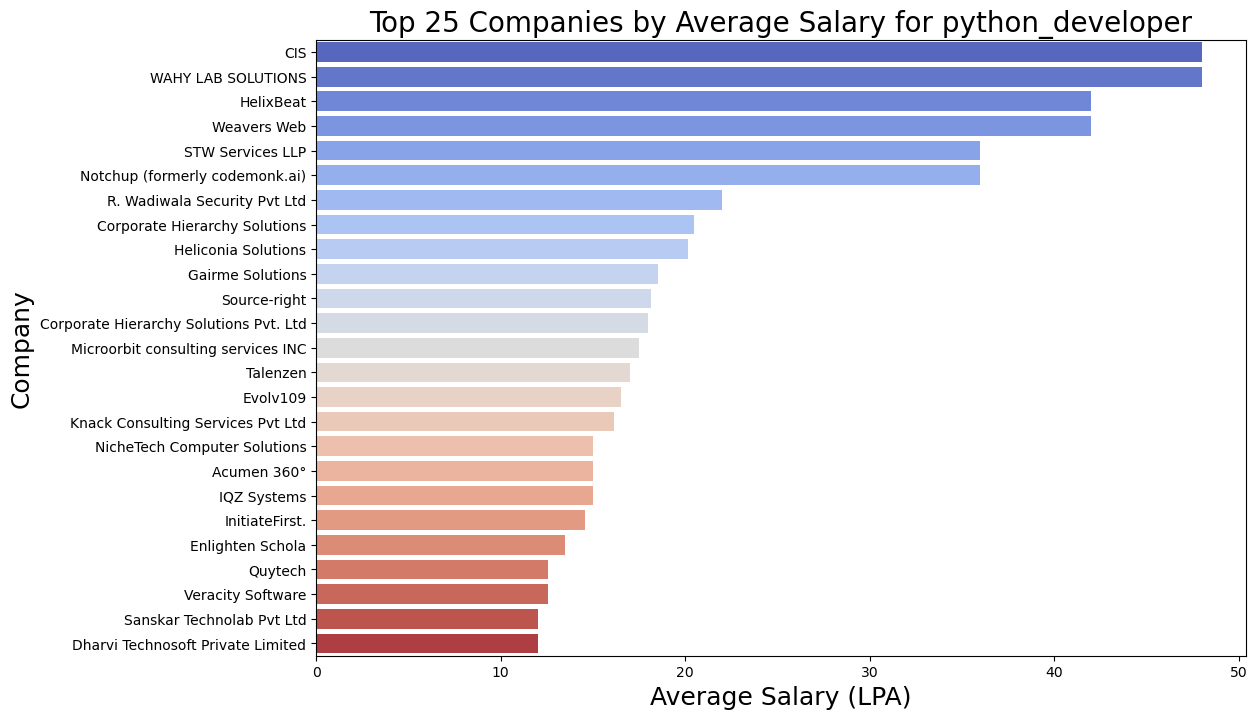

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt


top_10 = top_companies.head(25)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10['salary_lpa'], y=top_10['company_name'], palette="coolwarm")

plt.title(f"Top 25 Companies by Average Salary for {job}", fontsize=20)
plt.xlabel("Average Salary (LPA)", fontsize=18)
plt.ylabel("Company", fontsize=18)
plt.show()


### Location Vs Salary

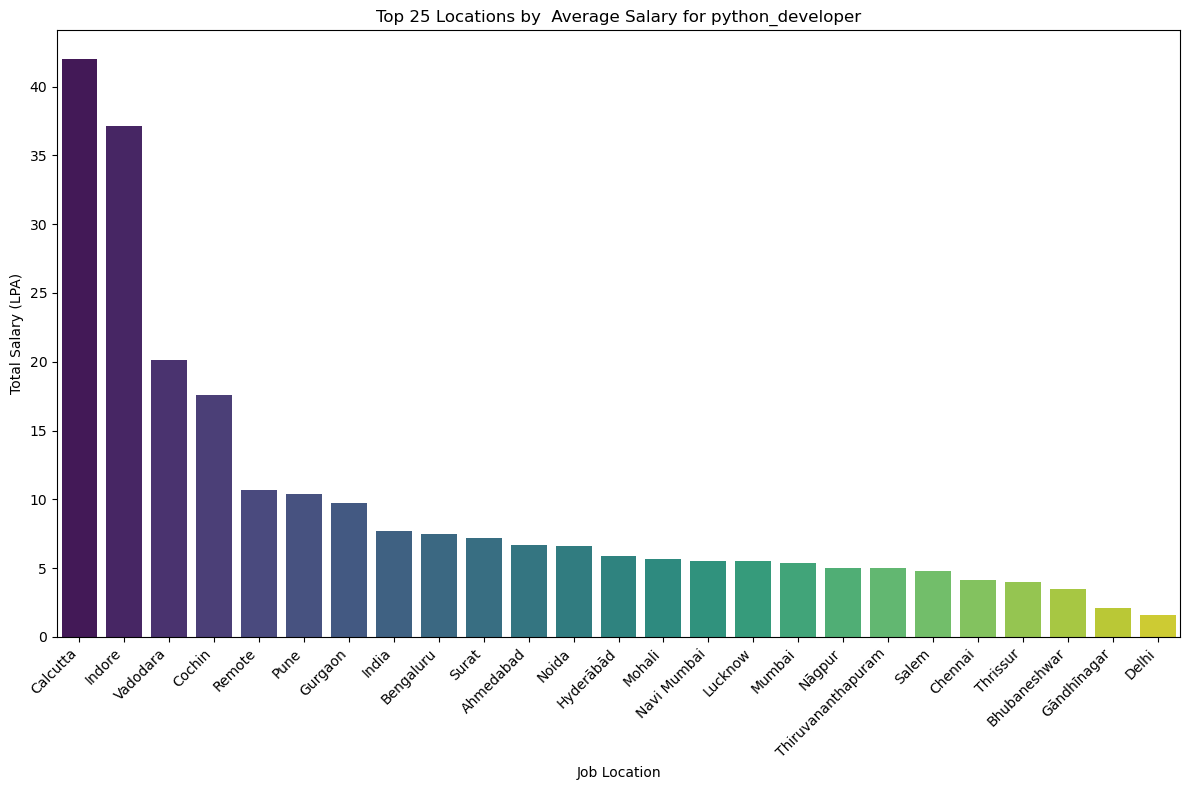

In [162]:
salary_by_location = df.groupby('job_location')['salary_lpa'].mean()


top_locations = salary_by_location.sort_values(ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


plt.xlabel('Job Location')
plt.ylabel('Total Salary (LPA)')
plt.title(f'Top 25 Locations by  Average Salary for {job}')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

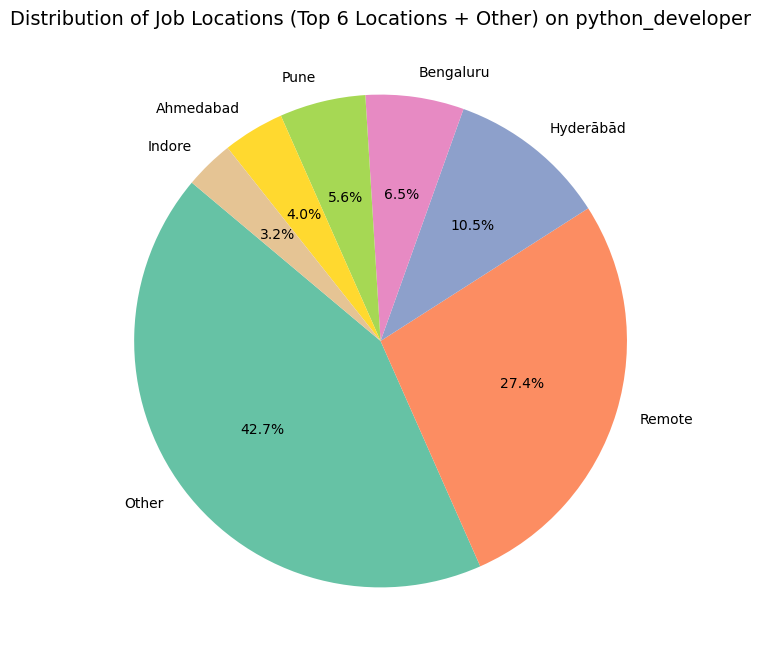

In [163]:
# Calculate the frequency of each location, excluding 'India'
location_counts = df[df['job_location'] != 'India']['job_location'].value_counts()

# Get the top 6 most frequent locations
top_locations = location_counts.head(6).index

# Group 'India' and other locations as 'Other'
df['job_location_grouped'] = df['job_location'].apply(lambda x: x if x in top_locations else 'Other')

# Calculate the frequency of the grouped locations
location_grouped_counts = df['job_location_grouped'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(location_grouped_counts, labels=location_grouped_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(location_grouped_counts)))

# Set the title
plt.title(f"Distribution of Job Locations (Top 6 Locations + Other) on {job}", fontsize=14)

# Show the pie chart
plt.show()

### Role vs Salary

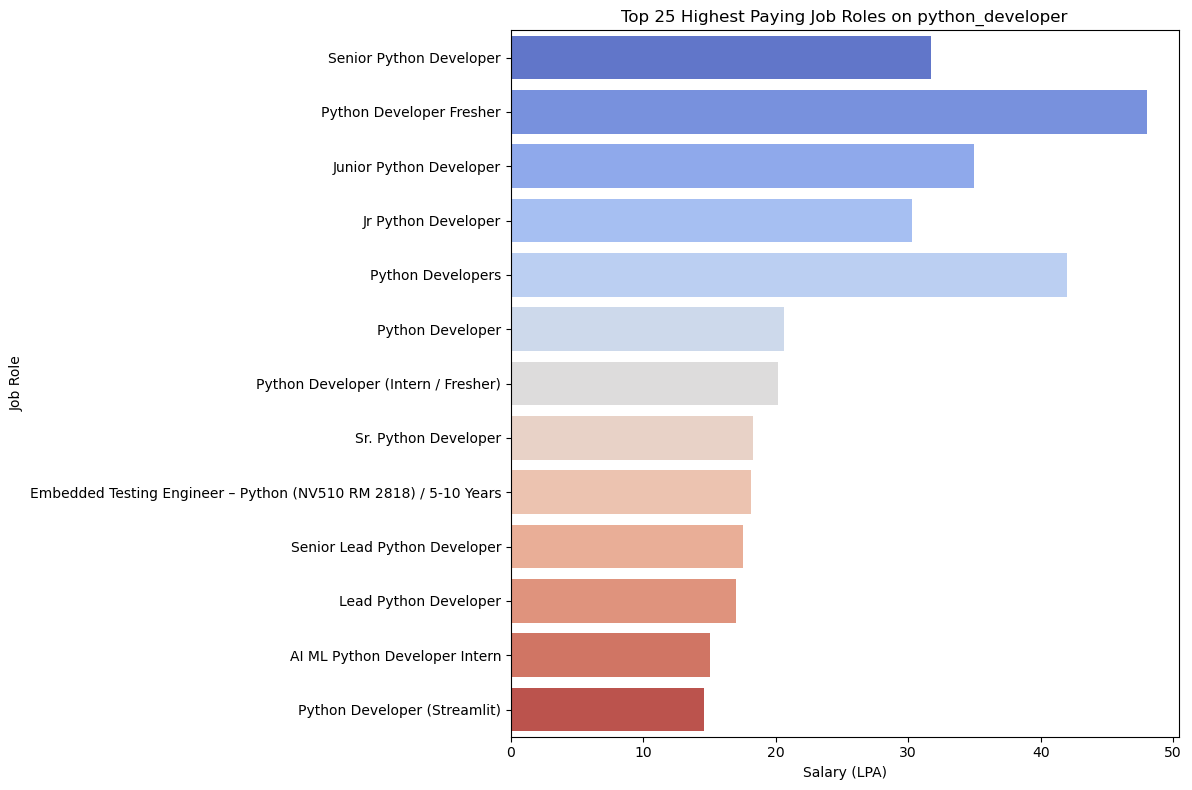

In [165]:
top_roles_by_salary = df[['job_role', 'salary_lpa']].sort_values(by='salary_lpa', ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x='salary_lpa', y='job_role', data=top_roles_by_salary, palette='coolwarm',errorbar=None)


plt.xlabel('Salary (LPA)')
plt.ylabel('Job Role')
plt.title(f'Top 25 Highest Paying Job Roles on {job}')


plt.tight_layout()
plt.show()

### Skills VS Salary

In [167]:
df_skills=df.explode("skills")
# Calculate the frequency of each skill
skill_counts = df_skills['skills'].value_counts()

# Get the top 10 most frequent skills
top_skills = skill_counts.head(10).index

# Filter the DataFrame to keep only rows with the top 10 skills
df_top_skills = df_skills[df_skills['skills'].isin(top_skills)]


C:\Users\Asus\AppData\Local\Temp\ipykernel_24364\2309435469.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


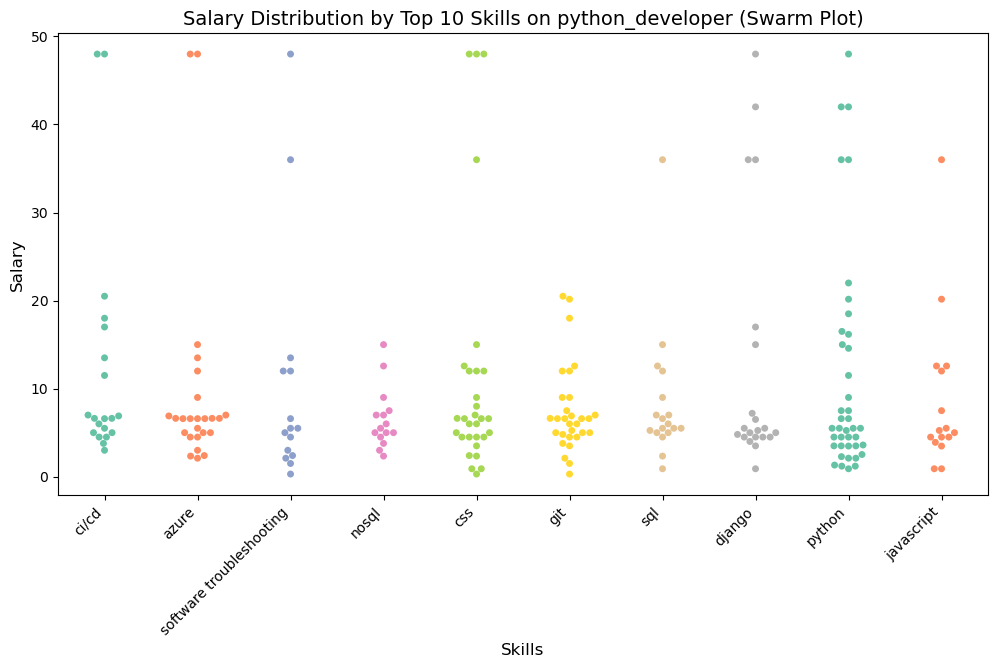

In [168]:
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.use_inf_as_na = True
plt.figure(figsize=(12, 6))
# sns.swarmplot(x='skills', y='salary_pa', data=df_top_skills, palette="Set2")
sns.swarmplot(x='skills', y='salary_lpa', data=df_top_skills,palette="Set2",hue="skills",legend=False)

plt.title(f"Salary Distribution by Top 10 Skills on {job} (Swarm Plot)", fontsize=14)
plt.xlabel("Skills", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

### Rating vs Salary

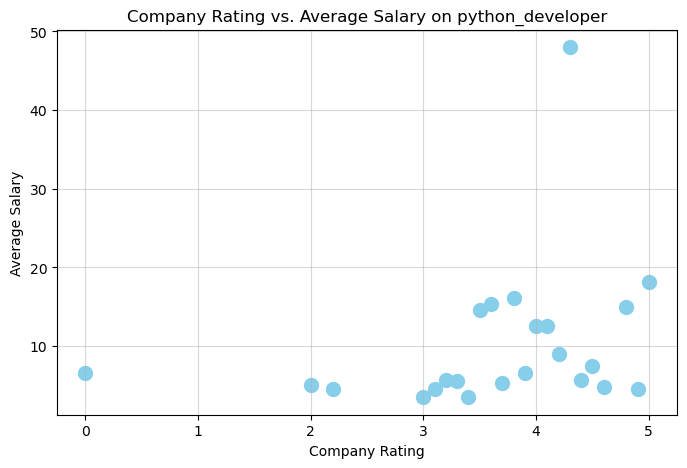

In [170]:
rating_avg_salary = df.groupby('company_rating')['salary_lpa'].mean()
# Step 1a: Map the. average salary to a diction
plt.figure(figsize=(8, 5))
plt.scatter(rating_avg_salary.index, rating_avg_salary.values, color='skyblue', s=100)
plt.title(f'Company Rating vs. Average Salary on {job}')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.grid(alpha=0.5)
plt.show()


In [171]:
df_filtered = df[df['company_rating'] != 0]
correlation = df_filtered['company_rating'].corr(df_filtered['salary_lpa'])
correlation

0.2526840476330498